# 9 Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn.cluster import DBSCAN
from sklearn import metrics
import datetime

#data import
X = pd.read_csv('3D_spatial_network.txt.gz', header = None, names = ['osm', 'lat', 'long', 'alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

#Normalize data
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['long'] = (X.long - X.long.mean())/X.long.std()


In [ ]:
# DBScan

min_samples = range(1, 11)
epsilon = [x / 100.0 for x in range(5,51,1)]
scores = []

#for i in min_samples:
#    for e in epsilon:
#        print(i, e)

print('started: ',datetime.datetime.now())

for i in min_samples:
    for e in epsilon:
        dbscan = DBSCAN( min_samples=i, eps=e)
        labels = dbscan.fit_predict(XX[['long', 'lat', 'alt']])
        scores.append(metrics.silhouette_score(XX[['long', 'lat', 'alt']],labels))
        print("finished: sample ", i, " epsilon ", e, "current time: ",datetime.datetime.now())

print('finished: ',datetime.datetime.now())
        


In [ ]:
plt.figure()
plt.plot(epsilon, scores)
plt.plot(min_samples, scores)
plt.xlabel("Epsilon / Samples")
plt.ylabel("Silhouette Coeff")
plt.show

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

started:  2018-12-10 00:31:40.475369
finished iteration:  2    2018-12-10 00:31:40.631229
finished iteration:  3    2018-12-10 00:31:40.742639
finished iteration:  4    2018-12-10 00:31:40.839156
finished iteration:  5    2018-12-10 00:31:40.934056
finished iteration:  6    2018-12-10 00:31:41.040838
finished iteration:  7    2018-12-10 00:31:41.139958
finished iteration:  8    2018-12-10 00:31:41.244240
finished iteration:  9    2018-12-10 00:31:41.366123
finished:  2018-12-10 00:31:41.366321


<IPython.core.display.Javascript object>


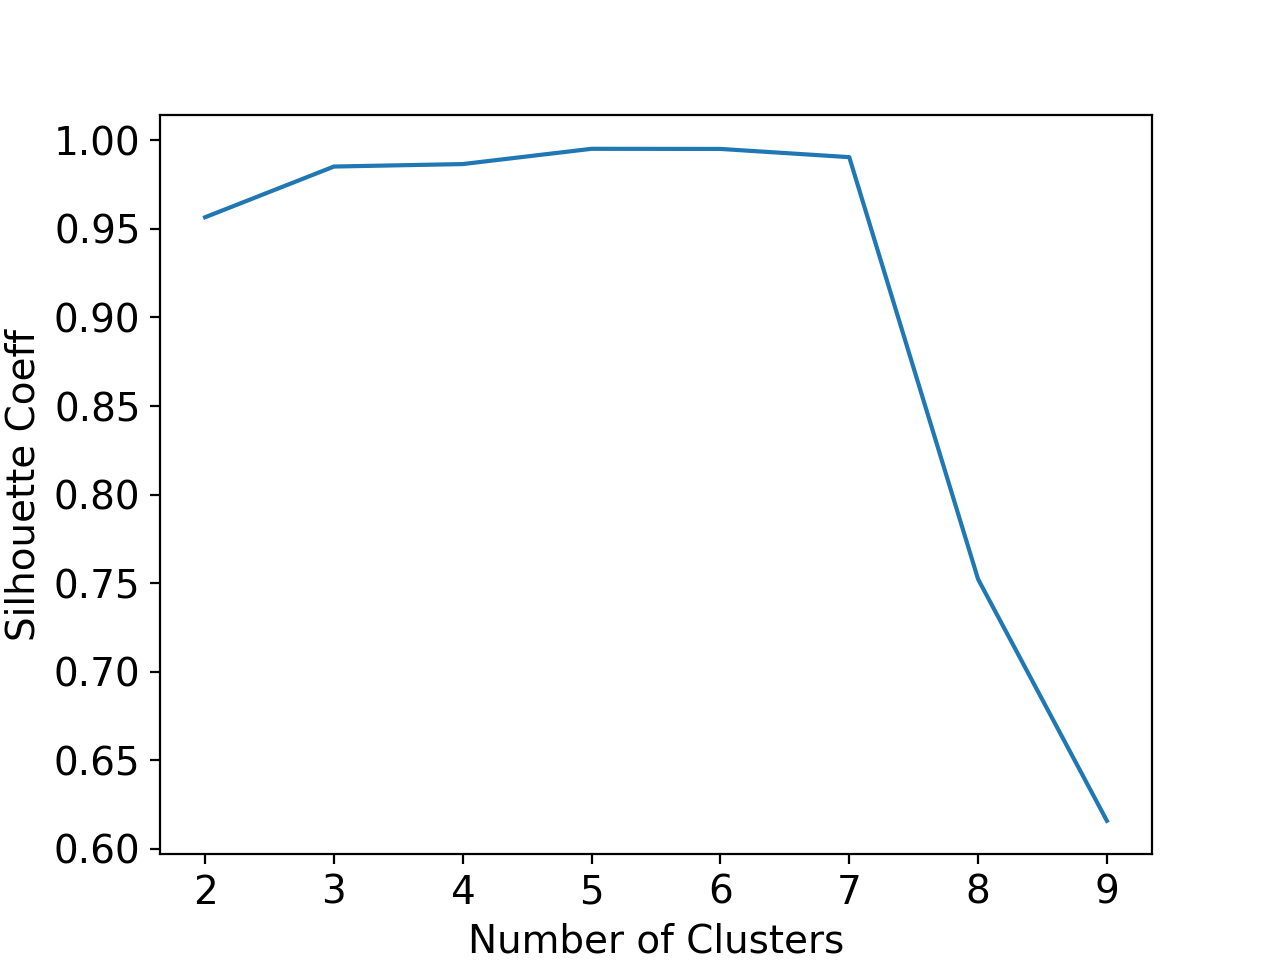

<function matplotlib.pyplot.show(*args, **kw)>

In [2]:
#data import
Y = pd.read_csv('beers.csv')
Y = Y.drop(['line', 'ibu', 'id', 'name', 'style', 'brewery_id'], axis = 1)
Y.head()
kscores = []

print('started: ',datetime.datetime.now())

#kmeans
from sklearn.cluster import KMeans
k_range = range(2,10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(Y[['abv', 'ounces']])
    kscores.append(metrics.silhouette_score(Y[['abv','ounces']], labels))
    print("finished iteration: ", k , "  ", datetime.datetime.now())

print('finished: ',datetime.datetime.now())

plt.figure()
plt.plot(k_range, kscores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coeff")
plt.show

##Based on plot, 7 clusters seems to be the best performance 

In [3]:
Y.head()

,abv,ounces,rating
0,0.128,19.2,3
1,0.125,16.0,3
2,0.120,16.0,3
3,0.104,19.2,0
4,0.100,12.0,2


<IPython.core.display.Javascript object>


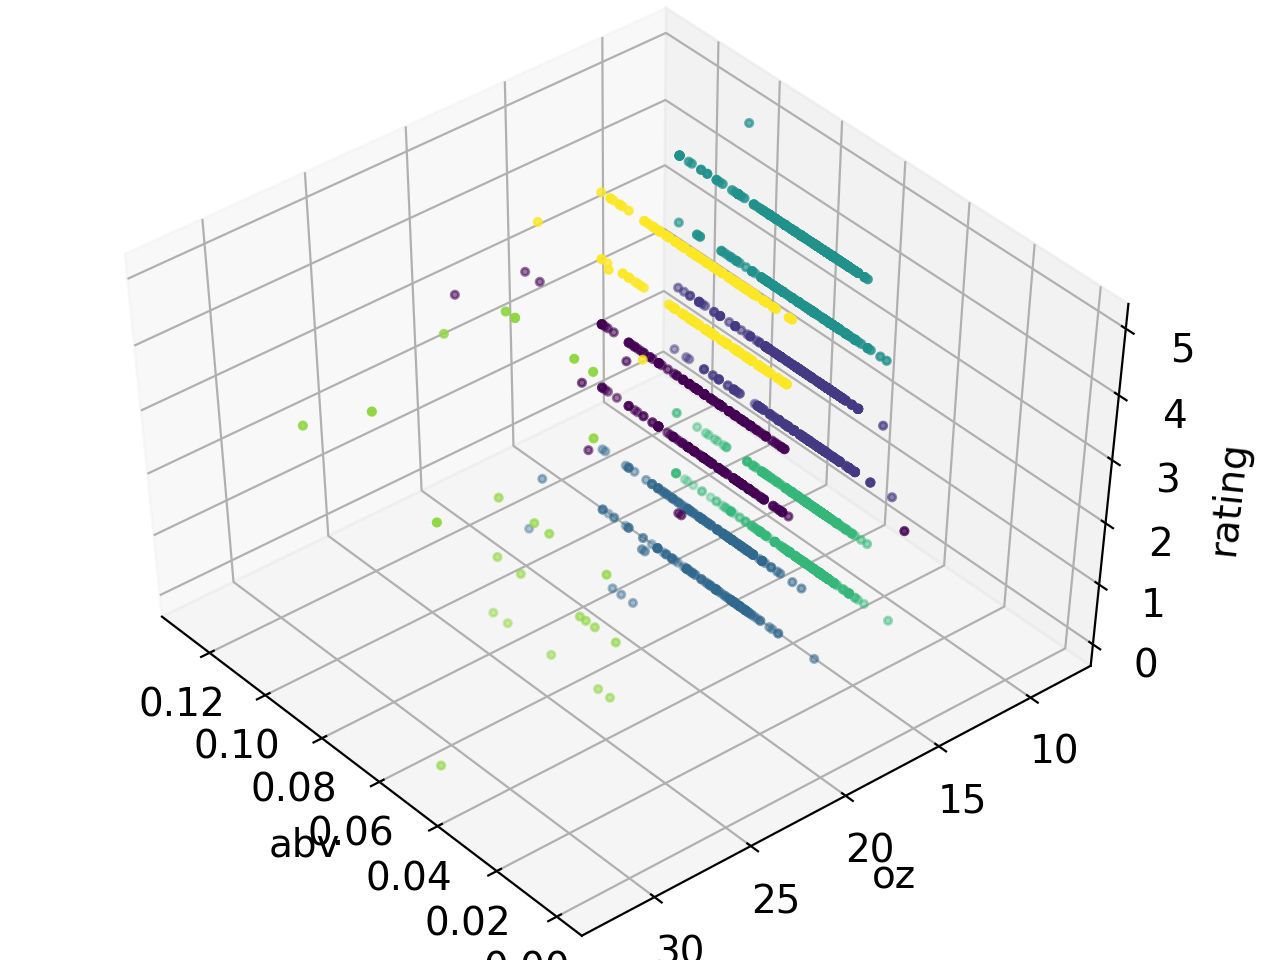

<function matplotlib.pyplot.show(*args, **kw)>

In [4]:
N = 7
km = KMeans(n_clusters=N, random_state=1)
km.fit(Y)
set(km.labels_)
Y['cluster'] = km.predict(Y)

# 3D chart

fig2 = plt.figure()
plt.clf()
ax = Axes3D(fig2, rect=[0,0,.95,1], elev = 48, azim=140)
ax.scatter(Y['abv'], Y['ounces'], Y['rating'], c=Y.cluster, s=7)
ax.set_xlabel('abv')
ax.set_ylabel('oz')
ax.set_zlabel('rating')
plt.show

In [5]:
# 2D chart

fig3 = plt.figure()
plt.scatter(Y.abv, Y.rating, c=Y.cluster, cmap='Paired')

plt.show

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.